Train Accuracy: 1.0
Test Accuracy : 0.9766081871345029

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



d:\Desktop\BINF5507_Capstone\.pixi\envs\default\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


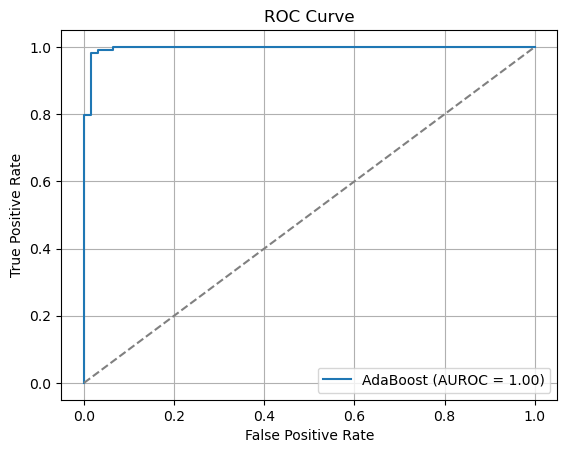

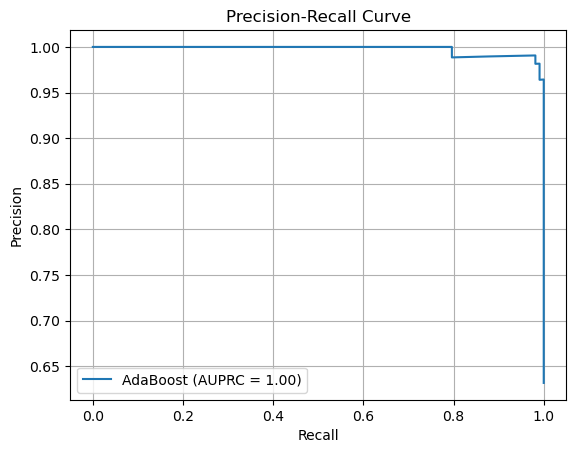

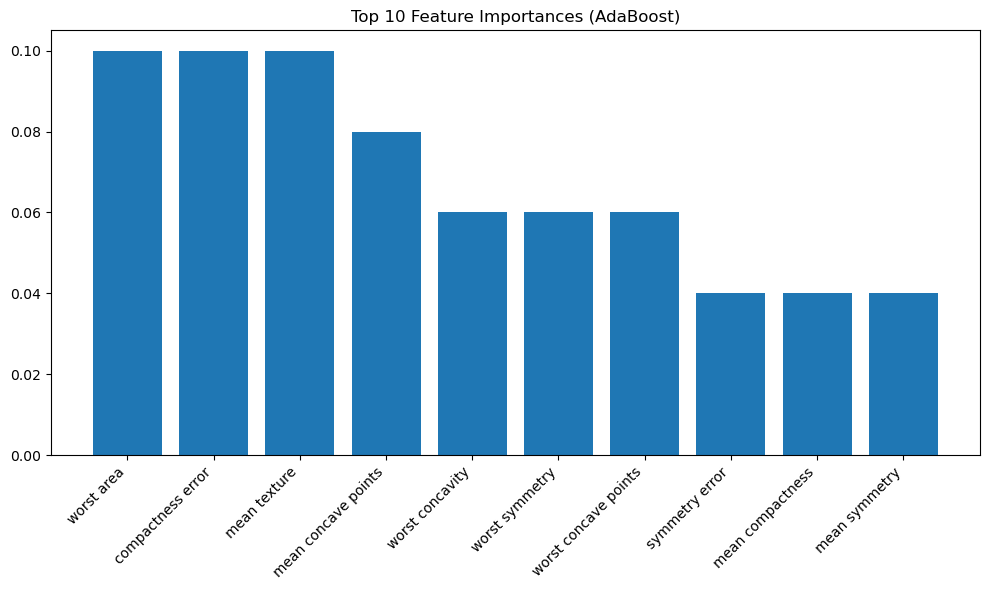

d:\Desktop\BINF5507_Capstone\.pixi\envs\default\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\Desktop\BINF5507_Capstone\.pixi\envs\default\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\Desktop\BINF5507_Capstone\.pixi\envs\default\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Cross-Validation AUROC Scores: [0.98820832 0.9950868  0.99966931 0.99140212 0.99597586]
Mean AUROC: 0.9940684806513499

Cross-Validation AUPRC Scores: [0.9935547  0.99703844 0.99980974 0.99393688 0.99760787]
Mean AUPRC: 0.9963895254018988


d:\Desktop\BINF5507_Capstone\.pixi\envs\default\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\Desktop\BINF5507_Capstone\.pixi\envs\default\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, precision_recall_curve, average_precision_score

# Load dataset
X, y = load_breast_cancer(return_X_y=True)
feature_names = load_breast_cancer().feature_names

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train AdaBoost with DecisionTree base estimator
model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Accuracy & Report
print("Train Accuracy:", model.score(X_train, y_train))
print("Test Accuracy :", model.score(X_test, y_test))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f'AdaBoost (AUROC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_proba)
avg_precision = average_precision_score(y_test, y_proba)
plt.figure()
plt.plot(recall, precision, label=f'AdaBoost (AUPRC = {avg_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

# Feature Importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Top 10 Feature Importances (AdaBoost)")
plt.bar(range(10), importances[indices][:10], align="center")
plt.xticks(range(10), feature_names[indices][:10], rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Cross-validation AUROC & AUPRC
cv_results = cross_validate(
    model, X, y, cv=5,
    scoring=["roc_auc", "average_precision"],
    return_train_score=False
)
print("\nCross-Validation AUROC Scores:", cv_results['test_roc_auc'])
print("Mean AUROC:", np.mean(cv_results['test_roc_auc']))
print("\nCross-Validation AUPRC Scores:", cv_results['test_average_precision'])
print("Mean AUPRC:", np.mean(cv_results['test_average_precision']))
